In [1]:
import re

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
kernel_2_df = pd.read_csv("kernel_components_2.csv")
kernel_2_df.head()

,Unnamed: 0,SMILES,log CMC,traintest,pred,type,err,Molecules,Molecule name,Molecule weight,Average temperature,CMC (M),Convertable,Component 1,Component 2
0,0,CCCCCCCCC(O)CO,3.361728,train,3.284244,nonionic,0.006004,<rdkit.Chem.rdchem.Mol object at 0x00000258C9A...,NaN,NaN,NaN,NaN,NaN,-0.664938,-0.100419
1,1,CCCCCCCCC(O)CCO,3.361728,train,3.240318,nonionic,0.014740,<rdkit.Chem.rdchem.Mol object at 0x00000258C9A...,NaN,NaN,NaN,NaN,NaN,-0.661460,-0.100952
2,2,CCCCCCCCCCCCC(O)CCO,1.113943,train,1.194439,nonionic,0.006479,<rdkit.Chem.rdchem.Mol object at 0x00000258C9A...,NaN,NaN,NaN,NaN,NaN,-0.637144,-0.095752
3,3,CCCCCCCCOCCO,3.690196,train,3.669114,nonionic,0.000444,<rdkit.Chem.rdchem.Mol object at 0x00000258C9A...,NaN,NaN,NaN,NaN,NaN,-0.645677,-0.093879
4,4,CCCCCCCCOCCOCCOCCO,3.875061,train,3.857243,nonionic,0.000318,<rdkit.Chem.rdchem.Mol object at 0x00000258C9A...,NaN,NaN,NaN,NaN,NaN,-0.656497,-0.097073


In [3]:
kernel_3_df = pd.read_csv("kernel_components_3.csv")
kernel_3_df.head()

,Unnamed: 0,SMILES,log CMC,traintest,pred,type,err,Molecules,Molecule name,Molecule weight,Average temperature,CMC (M),Convertable,Component 1,Component 2,Component 3
0,0,CCCCCCCCC(O)CO,3.361728,train,3.284244,nonionic,0.006004,<rdkit.Chem.rdchem.Mol object at 0x000001633A6...,NaN,NaN,NaN,NaN,NaN,-0.664938,-0.100419,-0.138057
1,1,CCCCCCCCC(O)CCO,3.361728,train,3.240318,nonionic,0.014740,<rdkit.Chem.rdchem.Mol object at 0x000001633A6...,NaN,NaN,NaN,NaN,NaN,-0.661460,-0.100952,-0.136119
2,2,CCCCCCCCCCCCC(O)CCO,1.113943,train,1.194439,nonionic,0.006479,<rdkit.Chem.rdchem.Mol object at 0x000001633A6...,NaN,NaN,NaN,NaN,NaN,-0.637144,-0.095752,-0.138802
3,3,CCCCCCCCOCCO,3.690196,train,3.669114,nonionic,0.000444,<rdkit.Chem.rdchem.Mol object at 0x000001633A6...,NaN,NaN,NaN,NaN,NaN,-0.645677,-0.093879,-0.111324
4,4,CCCCCCCCOCCOCCOCCO,3.875061,train,3.857243,nonionic,0.000318,<rdkit.Chem.rdchem.Mol object at 0x000001633A6...,NaN,NaN,NaN,NaN,NaN,-0.656497,-0.097073,-0.117374


In [4]:
def get_counterion(smiles: str) -> str:
    """Get the counterion for a smiles string"""
    pattern = r"\.(?P<counterion>\S+)"
    match = re.search(pattern, smiles)
    if match:
        return match.group("counterion")
    else:
        return "Nonionic"

In [5]:
def add_cols(df: pd.DataFrame):
    df["Counterion"] = df["SMILES"].apply(get_counterion)
    df["Source"] = ["Qin" if pd.isna(convertable) else "NIST" for convertable in df["Convertable"]]

In [6]:
add_cols(kernel_3_df)
add_cols(kernel_2_df)

Now let's filter out the counterions that only occur in the NIST data.

In [7]:
nist_df = kernel_2_df[kernel_2_df["Source"] == "NIST"]
qin_df = kernel_2_df[kernel_2_df["Source"] == "Qin"]

qin_counterions = set(qin_df["Counterion"].unique())
nist_counterions = set(nist_df["Counterion"].unique())

nist_only = nist_counterions - qin_counterions

def filter_entries(entry) -> bool:
    return entry["Source"] == "Qin" or entry["Counterion"] in nist_only

# kernel_df = kernel_df[[filter_entries(entry) for idx, entry in kernel_df.iterrows()]]

In [8]:
print(nist_counterions)

{'[Br-]', 'CCCCCCCCCCCCOC(=O)CC(=O)[O-].[K+].[K+]', 'CCCCCCCC[N+](C)(C)C.CCCCCCCC[N+](C)(C)C.O=S(=O)([O-])[O-]', '[Cl-]', 'CCCCCCCCOC(=O)CC(=O)[O-].[K+].[K+]', '[Na+]', 'C[N+](C)(C)C', 'CCCCCC[N+](C)(C)C.CCCCCC[N+](C)(C)C.O=S(=O)([O-])[O-]', 'Nonionic', 'CCCCCCCC[N+](C)(C)C', '[O-][Br+2]([O-])[O-]', 'CCCCCCCCCC[N+](C)(C)C', 'O=[N+]([O-])[O-]', 'CCCCCCCCCCCCCCOC(=O)CC(=O)[O-].[K+].[K+]', 'O=C[O-]'}


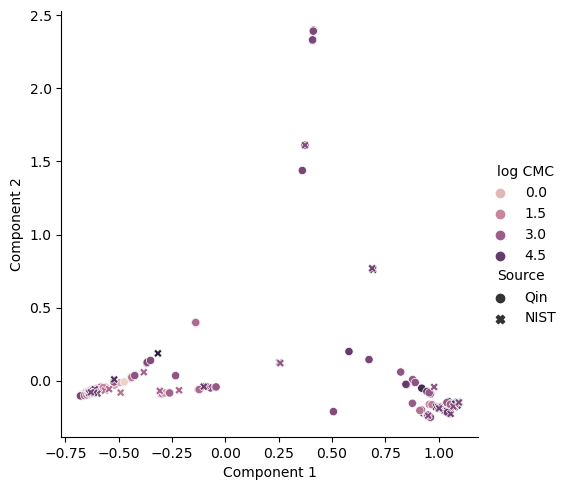

In [9]:
sns.relplot(kernel_2_df, x="Component 1", y="Component 2", hue="log CMC", style="Source")

(-0.8997239799311985,
 1.311188343400472,
 -0.3847257335349694,
 2.5325005120260444)

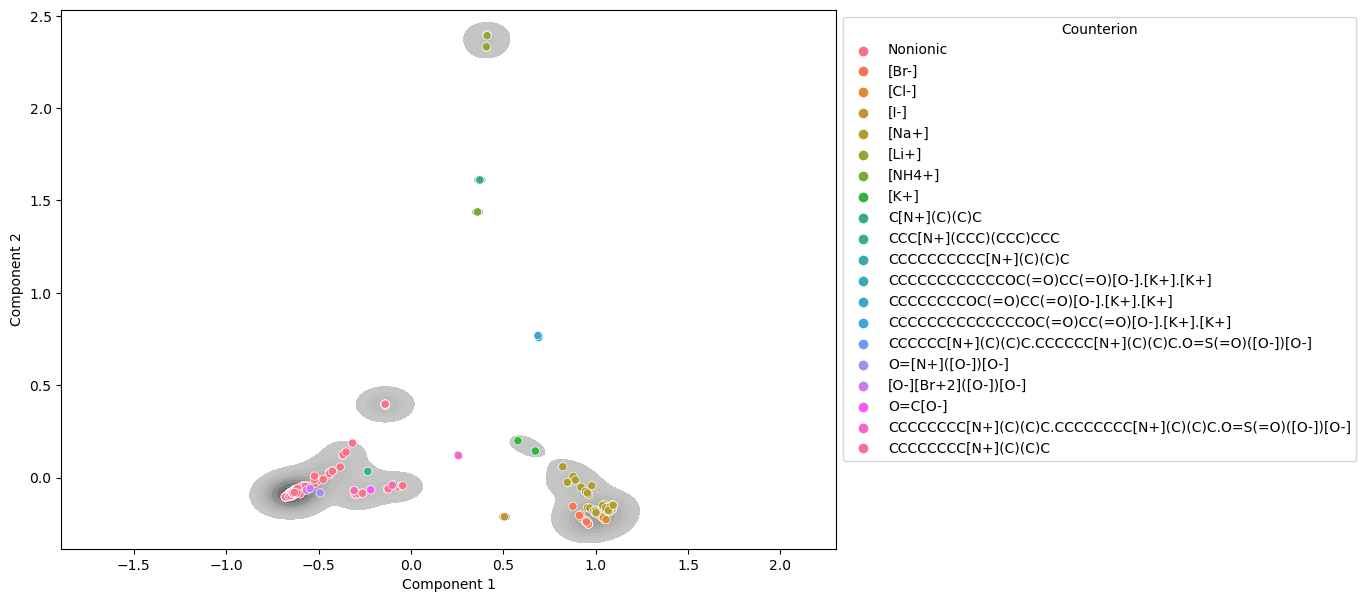

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.kdeplot(kernel_2_df[kernel_2_df["Source"] == "Qin"], x="Component 1", y="Component 2", palette="Greys", hue="Source", fill=True, ax=ax, bw_adjust=0.25)
sns.set_palette("bright")
# sns.scatterplot(kernel_2_df[kernel_2_df["Source"] == "NIST"], x="Component 1", y="Component 2", hue="Counterion", ax=ax)
sns.scatterplot(kernel_2_df, x="Component 1", y="Component 2", hue="Counterion", ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.axis("equal")

In [11]:
fig = px.scatter_3d(kernel_3_df, x="Component 1", y="Component 2", z="Component 3", color="Counterion", symbol="Source")
fig.update_layout(scene_aspectmode="cube")